# Инициализация

In [0]:
#@markdown - **Монтирование GoogleDrive** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
#@markdown - **Размонтирование**
!fusermount -u GoogleDrive

# Область кодов

In [0]:
#@title Линейная регрессия { display-mode: "both" }
# linear regression
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
 
learning_rate = 3e-2 #@param {type:"number"}
num = 32 #@param {type: "integer"}
num_epoch = 50 #@param {type: "integer"}

In [0]:
#@markdown - **Настройка параметров сетей**
sess = tf.Session()
 
x_input = tf.placeholder(tf.float32, shape=[None,], name='x_input')
y_input = tf.placeholder(tf.float32, shape=[None,], name='y_input')
w = tf.Variable(2.0, name='weight')
b = tf.Variable(1.0, name='biases')
y = tf.add(tf.multiply(x_input, w), b)
loss_op = tf.reduce_mean(tf.pow(y_input - y, 2))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

gradients_node = tf.gradients(loss_op, w)


Instructions for updating:
Colocations handled automatically by placer.


epoch: 1 	 loss: 2984.43 	 gradients: -5867.83
epoch: 2 	 loss: 2808.33 	 gradients: -5692.07
epoch: 3 	 loss: 2637.73 	 gradients: -5516.46
epoch: 4 	 loss: 2472.73 	 gradients: -5341.12
epoch: 5 	 loss: 2313.41 	 gradients: -5166.18
epoch: 6 	 loss: 2159.84 	 gradients: -4991.74
epoch: 7 	 loss: 2012.08 	 gradients: -4817.95
epoch: 8 	 loss: 1870.18 	 gradients: -4644.94
epoch: 9 	 loss: 1734.17 	 gradients: -4472.83
epoch: 10 	 loss: 1604.08 	 gradients: -4301.78
epoch: 11 	 loss: 1479.92 	 gradients: -4131.92
epoch: 12 	 loss: 1361.68 	 gradients: -3963.40
epoch: 13 	 loss: 1249.35 	 gradients: -3796.38
epoch: 14 	 loss: 1142.89 	 gradients: -3631.01
epoch: 15 	 loss: 1042.26 	 gradients: -3467.44
epoch: 16 	 loss: 947.39 	 gradients: -3305.84
epoch: 17 	 loss: 858.20 	 gradients: -3146.36
epoch: 18 	 loss: 774.61 	 gradients: -2989.17
epoch: 19 	 loss: 696.50 	 gradients: -2834.41
epoch: 20 	 loss: 623.75 	 gradients: -2682.26
epoch: 21 	 loss: 556.22 	 gradients: -2532.88
epoch: 

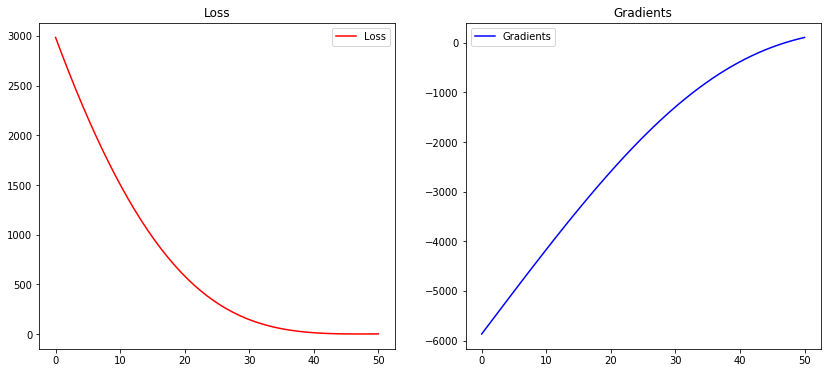

In [0]:
#@markdown - **Обучение сетей**
init = tf.global_variables_initializer()
sess.run(init)
 
# Генерация наборов обучающих данных
x_pure = np.random.randint(-10, 100, num)
x_train = x_pure + np.random.randn(num) / 10  # шум в направлении х
y_train = 3 * x_pure + 2 + np.random.randn(num) / 10  # шум в направлении y
Gradients = []
Loss = []
for i in range(num_epoch):
    _, gradients, loss = sess.run([train_op, gradients_node, loss_op],
                                  feed_dict={x_input: x_train, y_input: y_train})
    print_list = [i+1, loss, gradients[0]]
    print("epoch: {0[0]} \t loss: {0[1]:.2f} \t gradients: {0[2]:.2f}".format(print_list))
    Gradients.append(gradients)
    Loss.append(loss)
fig = plt.figure(1, (14, 6))
AX = [fig.add_subplot(i) for i in range(121,123)]
name = ['Loss', 'Gradients']
color = ['r', 'b']
#@markdown - **Представление изменения ошибок и градиентов**
data = [Loss, Gradients]
for na, ax, co, d in zip(name, AX, color, data):
    ax.plot(np.linspace(0,num_epoch,num_epoch), d, co, label=na)
    ax.set_title(na)
    ax.legend()
plt.show()

sess.close()